##Dataset Attach

Data Loading: We are loading the Telco Customer Churn dataset directly from a URL. We will check the data shape and column types to understand the dataset structure.

In [2]:
import pandas as pd
import numpy as np

# 1. Load dataset from URL
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# 2. Display first 5 rows
print("Dataset Loaded Successfully!")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
display(df.head())

# 3. Check data types (Look at 'TotalCharges')
print("\nData Info:")
print(df.info())

Dataset Loaded Successfully!
Rows: 7043, Columns: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-nul

##Data Cleaning:

Convert 'TotalCharges' to numeric (forcing errors to NaN).

Drop the 'customerID' column as it is not useful for prediction.

Drop rows with missing values.

Convert target 'Churn' from Yes/No to 1/0 for the model.

In [3]:
# 1. Convert 'TotalCharges' to numeric, turn errors (empty strings) into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Check for null values
print("Null values before dropping:")
print(df.isnull().sum())

# 3. Drop rows with null values (very few rows usually)
df.dropna(inplace=True)

# 4. Drop 'customerID' column
df.drop(columns=['customerID'], inplace=True)

# 5. Convert Target 'Churn' to numbers (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 6. Final check
print("\nData Cleaned Successfully!")
print(f"New Shape: {df.shape}")
display(df.head())

Null values before dropping:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Data Cleaned Successfully!
New Shape: (7032, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Encoding & Splitting:

Use pd.get_dummies to convert all text columns into numeric (0 or 1).

Separate Features (X) and Target (y).

Split the dataset: 80% for Training and 20% for Testing using train_test_split.

In [4]:
from sklearn.model_selection import train_test_split

# 1. Convert text columns to numbers (One-Hot Encoding)
# drop_first=True removes redundant columns to keep data clean
df_encoded = pd.get_dummies(df, drop_first=True)

# 2. Define Features (X) and Target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# 3. Split data: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Preparation Done!")
print(f"Training Rows: {X_train.shape[0]}")
print(f"Testing Rows: {X_test.shape[0]}")

# Show new columns
print("\nNew Columns created after encoding:")
print(X.columns.tolist())

Data Preparation Done!
Training Rows: 5625
Testing Rows: 1407

New Columns created after encoding:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


##Model Training:

Initialize the RandomForestClassifier.

Train the model using X_train and y_train.

Make predictions on the test set (X_test).

Evaluate performance using Accuracy and a Classification Report.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initialize the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the model
print("Training the model... Please wait.")
rf_model.fit(X_train, y_train)

# 3. Predict on Test Data
y_pred = rf_model.predict(X_test)

# 4. Check Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# 5. Detailed Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 6. Confusion Matrix (Optional visualization text)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Training the model... Please wait.

Model Accuracy: 78.54%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407


Confusion Matrix:
[[927 106]
 [196 178]]


**XAI with SHAP:**

Install the shap library.

Use TreeExplainer to explain the Random Forest model.

Create a summary_plot.

Red dots: High values of a feature (e.g., High Monthly Charges).

Blue dots: Low values.

Right side: Pushes towards Churn (Leaving).

Left side: Pushes towards Staying.

In [6]:
# 1. Install SHAP library (might take a few seconds)
!pip install shap

import shap

# 2. Initialize JavaScript visualization for Colab
shap.initjs()

# 3. Create a Tree Explainer for Random Forest
explainer = shap.TreeExplainer(rf_model)

# 4. Calculate SHAP values for the Test set
# (We take a small sample of 100 rows to make it faster)
X_test_sample = X_test.iloc[:100]
shap_values = explainer.shap_values(X_test_sample)

# 5. Plot the SHAP Summary Plot
print("Generating SHAP Summary Plot...")
# We use index [1] because we want to explain Class 1 (Churn = Yes)
shap.summary_plot(shap_values[1], X_test_sample)

Generating SHAP Summary Plot...


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

SHAP Fix: The new version of SHAP returns a 3D array (Samples, Features, Classes) instead of a list. We added a logic to check the shape and select the correct data for "Class 1" (Churn = Yes) automatically.

Generating SHAP Summary Plot (Fixed)...


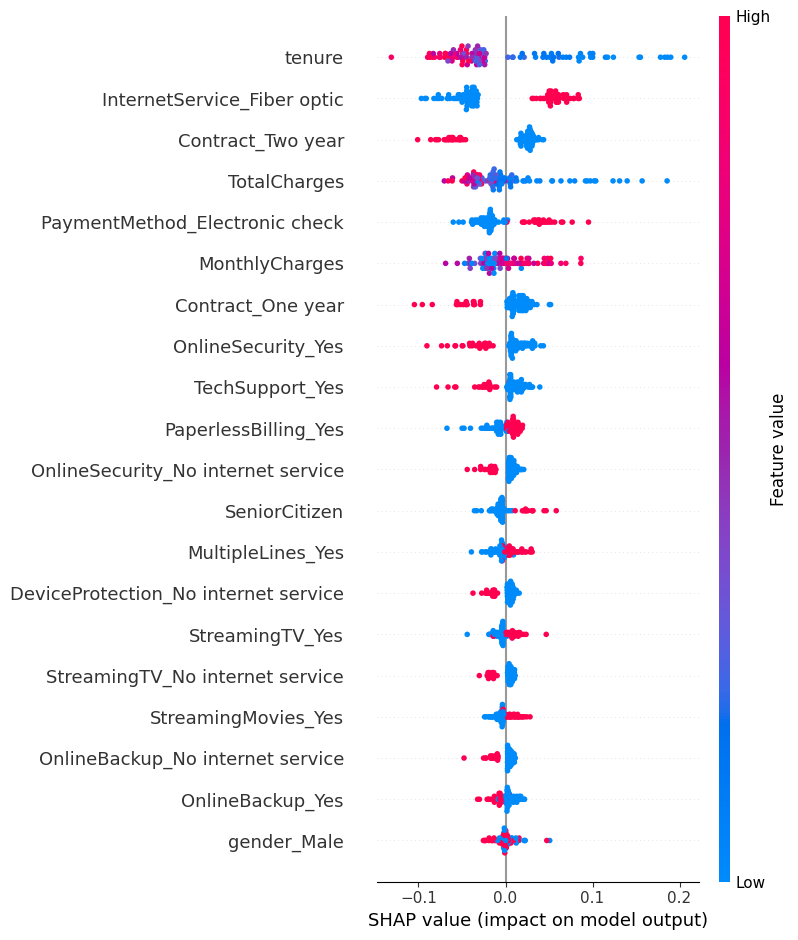

In [7]:
import numpy as np

# 1. Calculate SHAP values again for the sample
X_test_sample = X_test.iloc[:100]
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_sample)

# 2. Fix for SHAP version 0.50.0+ (Handling 3D Array)
# If it's a list, take index 1. If it's a 3D array, take index 1 from the last dimension.
if isinstance(shap_values, list):
    shap_vals_class1 = shap_values[1]
elif len(np.array(shap_values).shape) == 3:
    shap_vals_class1 = shap_values[:, :, 1]
else:
    shap_vals_class1 = shap_values

# 3. Plot the Summary Plot
print("Generating SHAP Summary Plot (Fixed)...")
shap.summary_plot(shap_vals_class1, X_test_sample)

In [8]:
import joblib

# 1. Save the trained model
joblib.dump(rf_model, 'churn_model.pkl')

# 2. Save the column names (Crucial for One-Hot Encoding)
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')

print("Files saved successfully!")
print("1. churn_model.pkl")
print("2. model_columns.pkl")

Files saved successfully!
1. churn_model.pkl
2. model_columns.pkl
